<img alt="header" src="./visuals/zillow-header.png"/>

<h1 align="center">Executive Summary</h1>

In [1]:
# Libraries
import pandas as pd
import numpy as np
import src

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Acquire

In [2]:
df = src.get_zillow_data()

In [3]:
df.head()

,id,transaction_date,parcel_id,baths,beds,sqft,lot_sqft,fips,latitude,longitude,region_zip_id,year_built,land_tax_value,tax_amount,log_error
0,349,2017-06-15,17054981,5.0,4.0,3760.0,42688.0,6111.0,34449407.0,-119254052.0,97099.0,1982.0,370922.0,9673.46,-0.013099
1,355,2017-07-26,17055743,2.0,3.0,1444.0,7108.0,6111.0,34454169.0,-119237898.0,97099.0,1951.0,305312.0,5538.80,0.073985
2,383,2017-07-28,17068109,1.5,3.0,1698.0,2588.0,6111.0,34365693.0,-119448392.0,97081.0,1979.0,93193.0,2987.36,0.071886
3,423,2017-07-07,17078502,1.0,2.0,1170.0,5643.0,6111.0,34278012.0,-119257047.0,97083.0,1948.0,444178.0,6220.70,-0.073787
4,429,2017-07-28,17079209,2.0,3.0,1257.0,5000.0,6111.0,34273903.0,-119273825.0,97081.0,1930.0,362000.0,4861.56,-0.011368


In [4]:
df.tail()

,id,transaction_date,parcel_id,baths,beds,sqft,lot_sqft,fips,latitude,longitude,region_zip_id,year_built,land_tax_value,tax_amount,log_error
21439,2981770,2017-07-05,11216258,3.0,4.0,3661.0,11178.0,6037.0,34574543.0,-118017577.0,97330.0,2006.0,63960.0,6753.55,-0.023366
21440,2981772,2017-06-02,11202627,2.0,3.0,1434.0,10410.0,6037.0,34583565.0,-118075910.0,97328.0,2006.0,30529.0,2528.23,-0.060401
21441,2981911,2017-06-01,11226749,2.0,3.0,2530.0,39622.0,6037.0,34553340.0,-117956621.0,97323.0,2007.0,78600.0,3736.00,-0.069711
21442,2982167,2017-07-31,11770199,1.0,3.0,792.0,2704.0,6037.0,34012294.0,-118246482.0,95992.0,1925.0,36012.0,1074.83,-0.039386
21443,2982270,2017-05-11,14157725,4.5,4.0,3127.0,8930.0,6059.0,33929748.0,-117801513.0,97037.0,2014.0,147419.0,6244.16,0.043652


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21444 entries, 0 to 21443
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21444 non-null  int64  
 1   transaction_date  21444 non-null  object 
 2   parcel_id         21444 non-null  int64  
 3   baths             21444 non-null  float64
 4   beds              21444 non-null  float64
 5   sqft              21342 non-null  float64
 6   lot_sqft          21291 non-null  float64
 7   fips              21444 non-null  float64
 8   latitude          21444 non-null  float64
 9   longitude         21444 non-null  float64
 10  region_zip_id     21430 non-null  float64
 11  year_built        21387 non-null  float64
 12  land_tax_value    21443 non-null  float64
 13  tax_amount        21443 non-null  float64
 14  log_error         21444 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 2.5+ MB


In [6]:
df.isna().sum().sort_values(ascending=False)

lot_sqft            153
sqft                102
year_built           57
region_zip_id        14
tax_amount            1
land_tax_value        1
log_error             0
longitude             0
latitude              0
fips                  0
beds                  0
baths                 0
parcel_id             0
transaction_date      0
id                    0
dtype: int64

In [7]:
df.nunique().sort_values(ascending=False)

parcel_id           21435
id                  21435
log_error           21317
tax_amount          21185
longitude           21159
latitude            21115
land_tax_value      17099
lot_sqft             9028
sqft                 3803
region_zip_id         377
year_built            130
transaction_date       90
baths                  20
beds                   13
fips                    3
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21444.0,1.506111e+06,8.604406e+05,3.490000e+02,7.659842e+05,1.514090e+06,2.249418e+06,2.982270e+06
parcel_id,21444.0,1.304789e+07,3.900699e+06,1.071186e+07,1.151342e+07,1.259242e+07,1.414996e+07,1.676878e+08
baths,21444.0,2.320696e+00,1.020715e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.100000e+01
beds,21444.0,3.310157e+00,9.466028e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.200000e+01
sqft,21342.0,1.940307e+03,9.948681e+02,2.400000e+02,1.278000e+03,1.678000e+03,2.338000e+03,1.545000e+04
lot_sqft,21291.0,1.086941e+04,5.667071e+04,5.400000e+02,5.592000e+03,6.876000e+03,8.841500e+03,6.971010e+06
fips,21444.0,6.049485e+03,2.123174e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,21444.0,3.401959e+07,2.752174e+05,3.334085e+07,3.382179e+07,3.402272e+07,3.418824e+07,3.481877e+07
longitude,21444.0,-1.181955e+08,3.604271e+05,-1.194484e+08,-1.184057e+08,-1.181540e+08,-1.179255e+08,-1.175554e+08
region_zip_id,21430.0,9.665478e+04,5.088600e+03,9.598200e+04,9.620800e+04,9.641200e+04,9.699500e+04,3.996750e+05


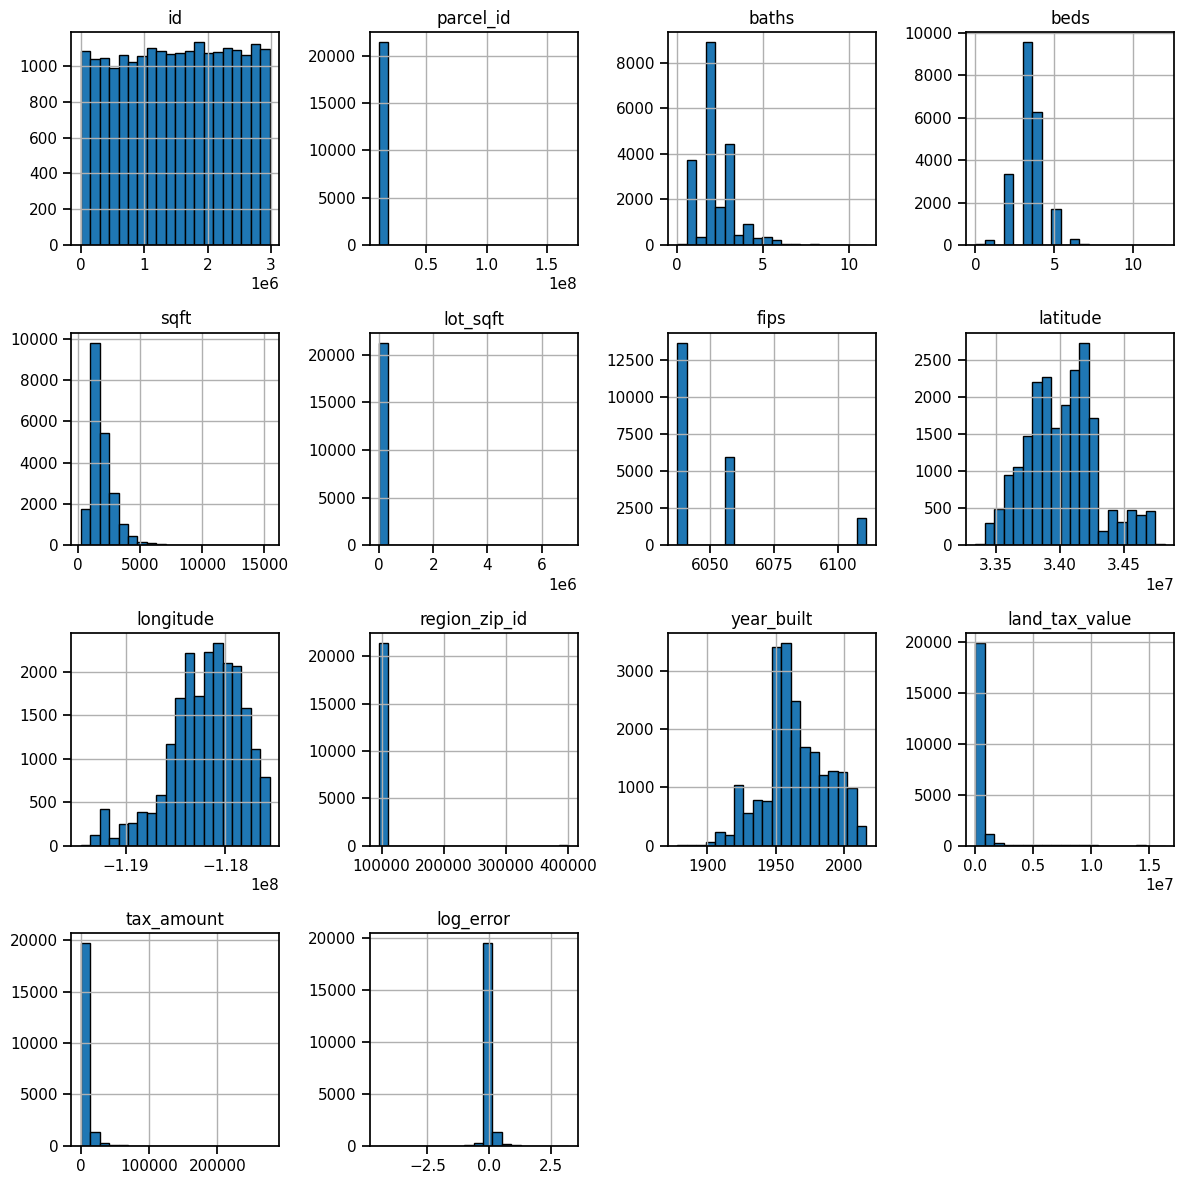

In [9]:
plt.style.use('default')
sns.set_context('notebook')

df.hist(figsize=(12, 12), bins=20, ec='black')
plt.tight_layout();

# Prepare

In [10]:
df = src.prepare_zillow(df)

In [11]:
train, validate, test = src.create_datasets(df)

In [12]:
train.head()

,id,transaction_date,parcel_id,baths,beds,sqft,lot_sqft,fips,latitude,longitude,region_zip_id,year_built,land_tax_value,tax_amount,log_error
397,53179,2017-06-13,12693064,3.0,3.0,1818.0,12437.0,6037,33.756339,-118.315907,96122,1957,52993.0,1790.22,-0.082074
10020,1418434,2017-07-27,10780033,3.0,3.0,1977.0,5002.0,6037,34.184682,-118.529046,96364,1968,143571.0,4442.62,-0.051988
5470,781265,2017-05-15,12029810,2.0,3.0,1809.0,4880.0,6037,34.135584,-118.342802,96049,1927,547059.0,9546.53,0.024099
18668,2606518,2017-06-14,14249569,2.0,4.0,1412.0,6061.0,6059,33.767863,-117.844828,97005,1972,181647.0,3201.18,-0.020836
11319,1600354,2017-06-28,11636458,5.0,3.0,3369.0,11936.0,6037,34.076511,-118.397844,96086,1928,242301.0,4051.18,0.017932


# Explore

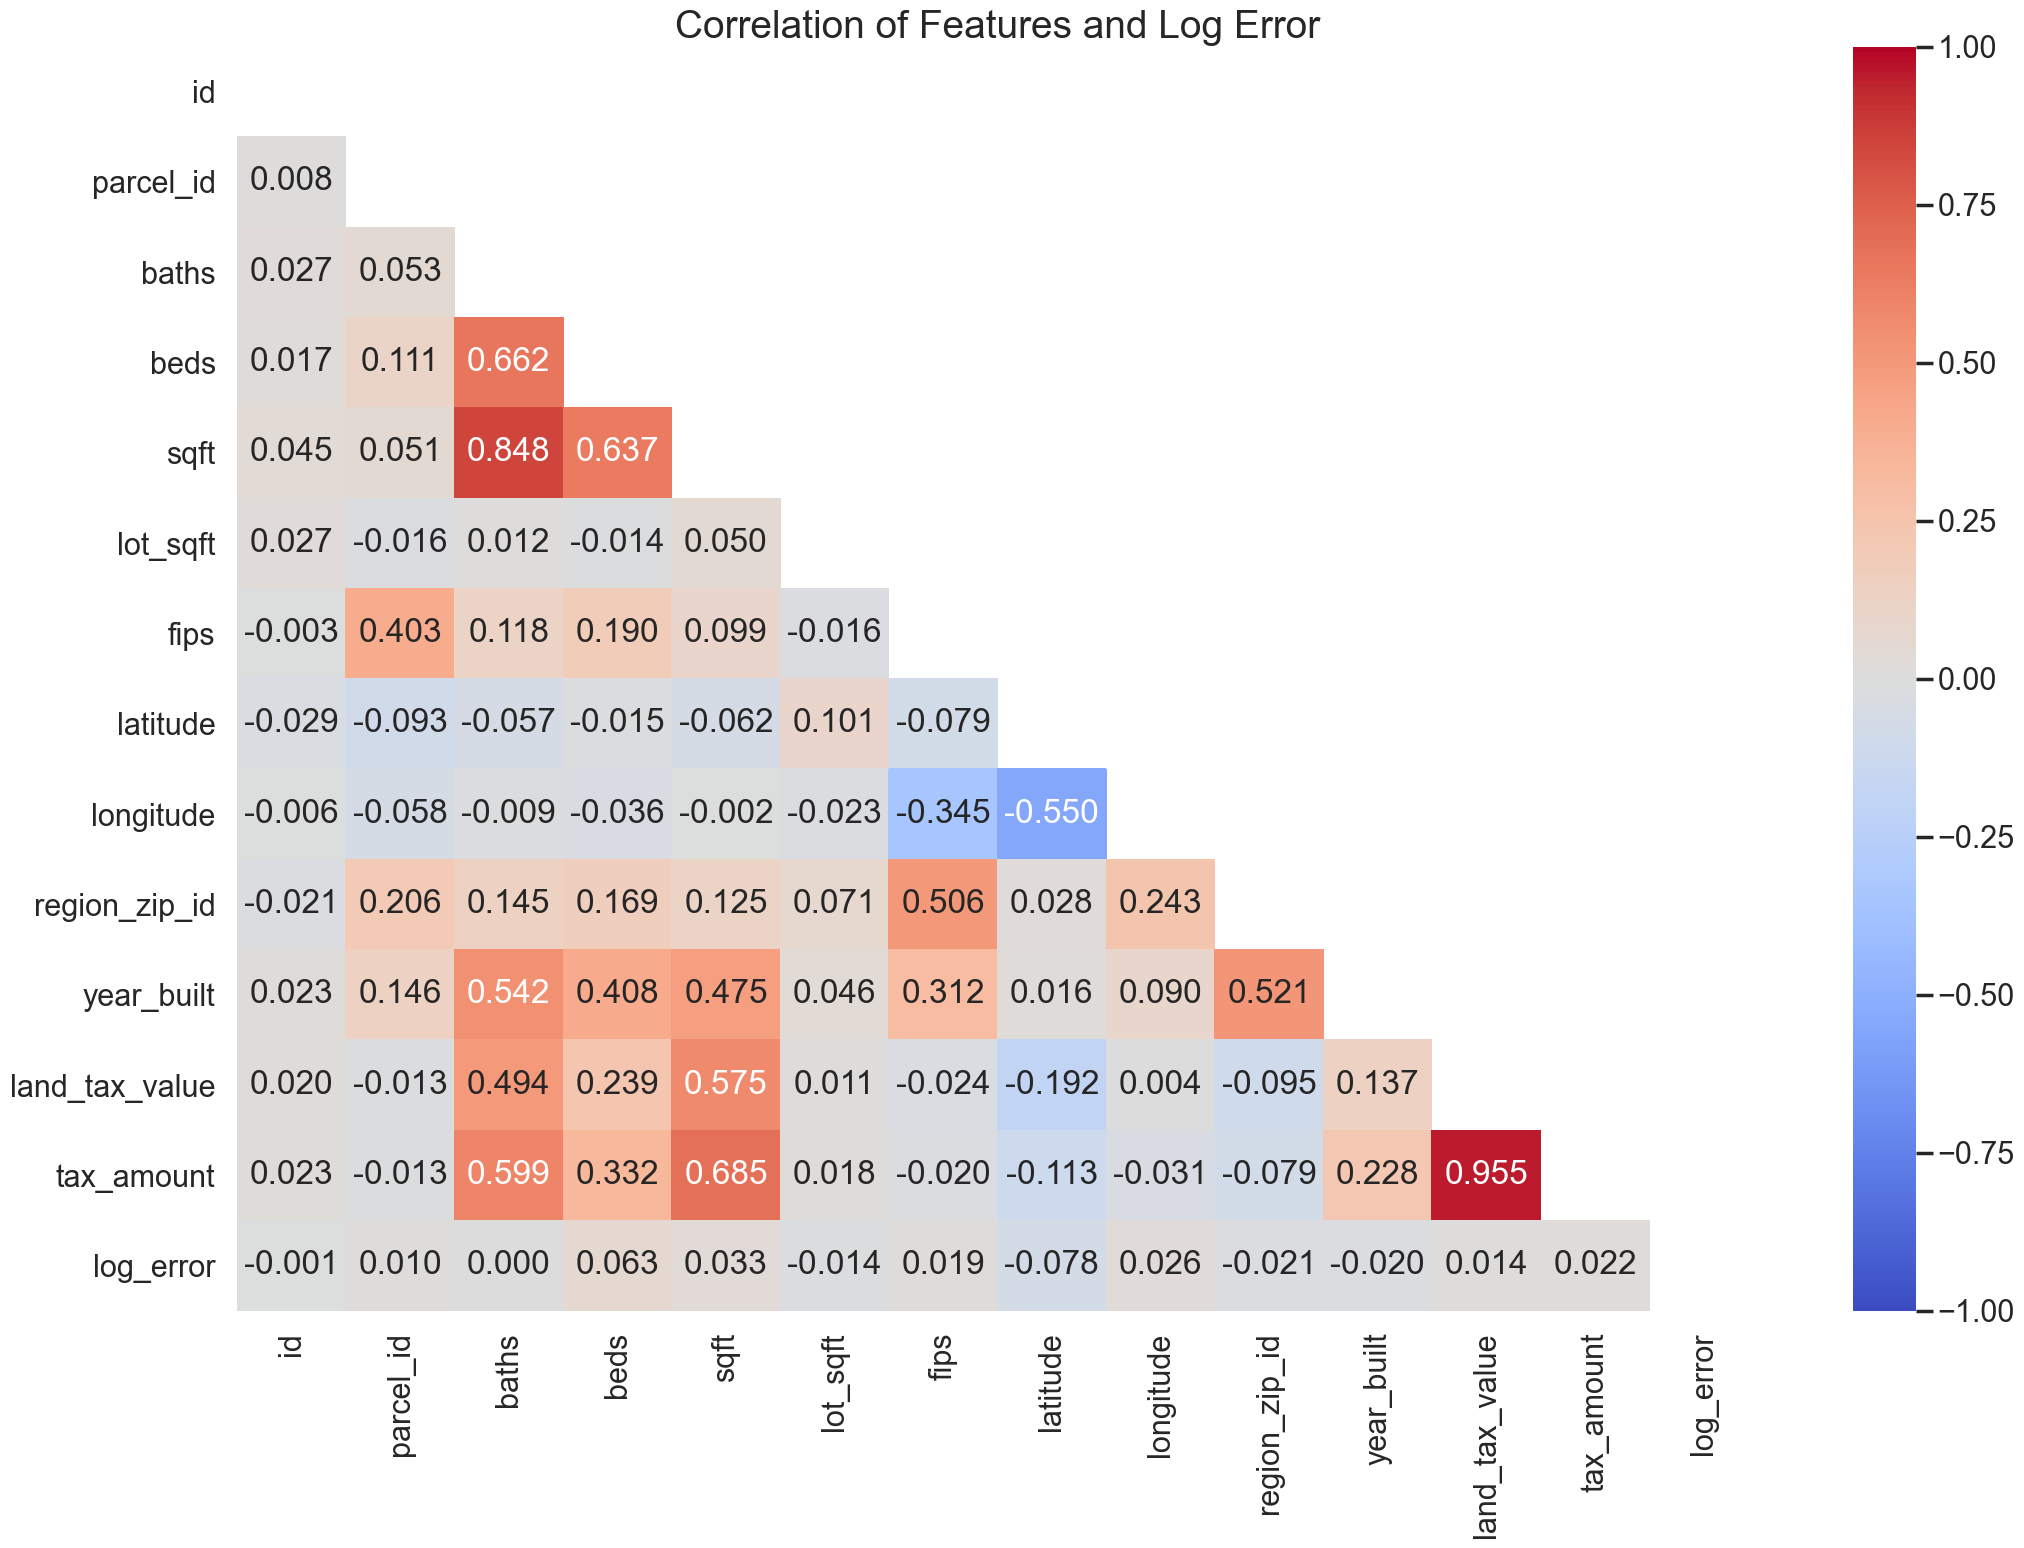

In [13]:
# correlations = train.corr()
correlations = train.sample(1000, random_state=369).corr()


# Create a boolean array to use as a mask to remove the upper corner from the heatmap.
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.set_context('poster')
# Set the context of the heatmap with a white background
with sns.axes_style("white"):
    sns.set_context('poster')
    f, ax = plt.subplots(figsize=(22, 16))

    ax = sns.heatmap(correlations,
                     annot=True,
                     cmap='coolwarm',
                     vmin=-1,
                     vmax=1,
                     mask=mask,
                     fmt='.03f')

    ax.set_title("Correlation of Features and Log Error", fontsize=28)
    plt.tight_layout()
    plt.show()

In [14]:
fields = train.select_dtypes('number').columns.to_list()
drop = ['fips', 'id', 'log_error', 'parcel_id', 'latitude', 'longitude']
cols = [col for col in fields if col not in drop]

cols

['baths',
 'beds',
 'sqft',
 'lot_sqft',
 'region_zip_id',
 'year_built',
 'land_tax_value',
 'tax_amount']

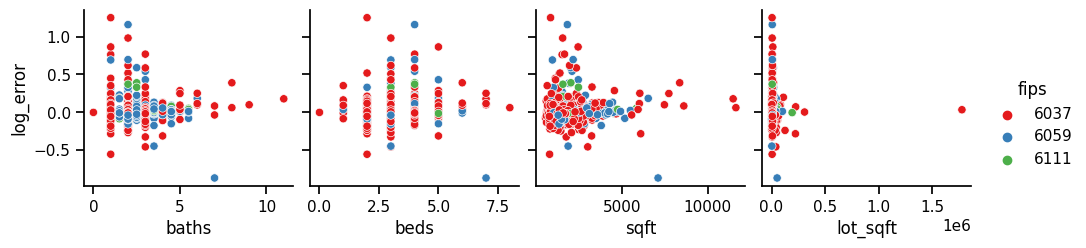

In [15]:
sns.set_context('notebook')

sns.pairplot(train.sample(1000, random_state=369),
             x_vars=cols[:4],
             y_vars='log_error',
             hue='fips',
             hue_order=[6037,6059,6111],
             palette='Set1');

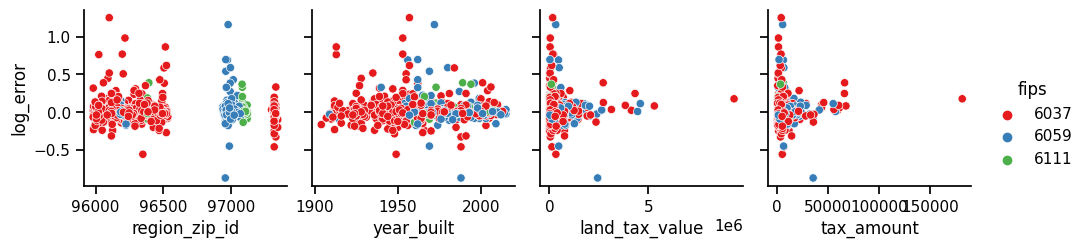

In [16]:
sns.set_context('notebook')

sns.pairplot(train.sample(1000, random_state=369),
             x_vars=cols[4:8],
             y_vars='log_error',
             hue='fips',
             hue_order=[6037,6059,6111],
             palette='Set1');

In [17]:
fig = px.histogram(train,
                   x="log_error",
                   histnorm="probability",
                   range_x=[-1, 1],
                   title="Distribution of Log Error")
fig.show()

In [18]:
fig = px.scatter_geo(data_frame=train,
                    lat = train.latitude,
                    lon = train.longitude,
                    color=train.fips)
fig.show()

### Hypothesis Tests

H0 - There is no relationship between square feet and home value

H1 - There is a relationship between square feet and home value


H0 - There is no relationship between taxvaluedollarcnt and bathroomcnt

H1 - There is a relationship between taxvaluedollarcnt and bathroomcnt


H0 -The average price of homes with more than two bathrooms is equal to the average price of homes with two or less bathrooms.

H1 - Homes with more than two bathrooms have higher than average tax dollar count.


# Model

# Conclusions